In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_excel('/content/Final.xlsx')

In [4]:
data

,Unnamed: 0.1,Unnamed: 0,Player,Market value,Nation,Pos,Club_x,Leauge,Age,MP,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,0,0,Kylian Mbappé,€180.00m,FRA,FW,Paris S-G,Ligue1,20.0,49.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,1,1,Raheem Sterling,€128.00m,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,2,2,Neymar,€128.00m,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,3,3,Sadio Mané,€120.00m,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,4,4,Mohamed Salah,€120.00m,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,514,Keita Baldé,€16.00m,SEN,"MF,FW",Monaco,Ligue1,24.0,45.0,...,4.0,12.0,466.0,639.0,72.93,891.0,26.0,41.0,63.41,26.0
513,513,515,Breel Embolo,€16.00m,SUI,"MF,FW",M'gladbach,Bundesliga,22.0,48.0,...,14.0,9.0,482.0,670.0,71.94,1205.0,57.0,133.0,42.86,68.0
514,514,516,Nadiem Amiri,€16.00m,GER,"MF,FW",Leverkusen,Bundesliga,22.0,43.0,...,23.0,13.0,1233.0,1531.0,80.54,1862.0,50.0,80.0,62.50,54.0
515,515,517,Lucas Vázquez,€16.00m,ESP,"MF,FW",Real Madrid,La Liga,28.0,45.0,...,21.0,11.0,1084.0,1361.0,79.65,1733.0,52.0,83.0,62.65,56.0


In [6]:
data = data.dropna()

In [ ]:
data.isnull().sum()

In [8]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Player', 'Market value', 'Nation', 'Pos',
       'Club_x', 'Leauge', 'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK_x',
       'PKatt_x', 'CrdY', 'CrdR', 'Gls90', 'Ast90', 'G+A', 'Gls+Ast', 'PK',
       'PKatt', 'Sh', 'SoT', 'FK', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT',
       'Tackle', 'TackleW', 'TakleD', 'Tkl%', 'Press', 'Succ_x', '%', 'Blocks',
       'ShotB', 'PassB', 'Int', 'Clr', 'Passes Completed', 'Passes Attempted',
       'Cmp%', 'Touches', 'Succ_y', 'Att', 'Succ%', '#Pl'],
      dtype='object')

Se procede a tomar un dataset mas pequeño para un mejor analisis y predicción


In [9]:
data.drop(columns = ['Unnamed: 0.1','Unnamed: 0','Player','Nation','Club_x','MP','Starts','PK_x','PKatt_x','CrdY','CrdR','FK','Sh/90', 'SoT/90', 'G/Sh', 'G/SoT','TakleD', 'Succ_x', '%','ShotB', 'PassB', 'Int', 'Clr', 'Cmp%', 'Touches', 'Succ_y', 'Att', 'Succ%', '#Pl','PK','PKatt','Sh'], inplace=True)
data

<ipython-input-9-ca16d72365b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['Unnamed: 0.1','Unnamed: 0','Player','Nation','Club_x','MP','Starts','PK_x','PKatt_x','CrdY','CrdR','FK','Sh/90', 'SoT/90', 'G/Sh', 'G/SoT','TakleD', 'Succ_x', '%','ShotB', 'PassB', 'Int', 'Clr', 'Cmp%', 'Touches', 'Succ_y', 'Att', 'Succ%', '#Pl','PK','PKatt','Sh'], inplace=True)


,Market value,Pos,Leauge,Age,Min,Gls,Ast,Gls90,Ast90,G+A,Gls+Ast,SoT,SoT%,Tackle,TackleW,Tkl%,Press,Blocks,Passes Completed,Passes Attempted
0,€180.00m,FW,Ligue1,20.0,3856.0,51.0,12.0,1.19,0.28,1.47,63.0,114.0,54.55,11.0,6.0,11.1,418.0,14.0,1152.0,1494.0
1,€128.00m,FW,Premier Leauge,24.0,4968.0,29.0,10.0,0.53,0.18,0.71,39.0,62.0,40.52,62.0,41.0,31.0,849.0,58.0,1963.0,2414.0
2,€128.00m,"MF,FW",Ligue1,27.0,2757.0,28.0,13.0,0.91,0.42,1.33,41.0,52.0,45.22,31.0,17.0,18.5,381.0,24.0,1588.0,2016.0
3,€120.00m,FW,Premier Leauge,27.0,5327.0,37.0,8.0,0.63,0.14,0.77,45.0,72.0,48.00,90.0,61.0,34.9,1151.0,64.0,1728.0,2214.0
4,€120.00m,FW,Premier Leauge,27.0,5579.0,39.0,15.0,0.63,0.24,0.87,54.0,103.0,42.92,34.0,25.0,15.4,1103.0,31.0,1516.0,2029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,€16.00m,"MF,FW",Ligue1,24.0,1747.0,9.0,3.0,0.46,0.15,0.61,12.0,30.0,51.72,21.0,15.0,12.5,339.0,19.0,466.0,639.0
513,€16.00m,"MF,FW",Bundesliga,22.0,2895.0,13.0,6.0,0.40,0.19,0.59,19.0,31.0,43.66,43.0,31.0,35.3,650.0,25.0,482.0,670.0
514,€16.00m,"MF,FW",Bundesliga,22.0,2611.0,4.0,3.0,0.14,0.10,0.24,7.0,24.0,38.71,38.0,25.0,15.4,445.0,37.0,1233.0,1531.0
515,€16.00m,"MF,FW",La Liga,28.0,2154.0,3.0,4.0,0.13,0.17,0.30,7.0,13.0,40.62,56.0,35.0,33.3,602.0,36.0,1084.0,1361.0


In [ ]:
data.iloc[141]

In [ ]:
data.sample(5)

Recién vi irregularidades en la columna **Market Value**
Procedo a hacer la respectiva limpieza

In [ ]:
data['Market value'] = data['Market value'].apply(lambda x: x.replace("€",""))
data

In [ ]:
data['Market value'] = data['Market value'].apply(lambda x: x.replace("m",""))
data

In [ ]:
data['Market value'] = data['Market value'].astype('float64')

In [17]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

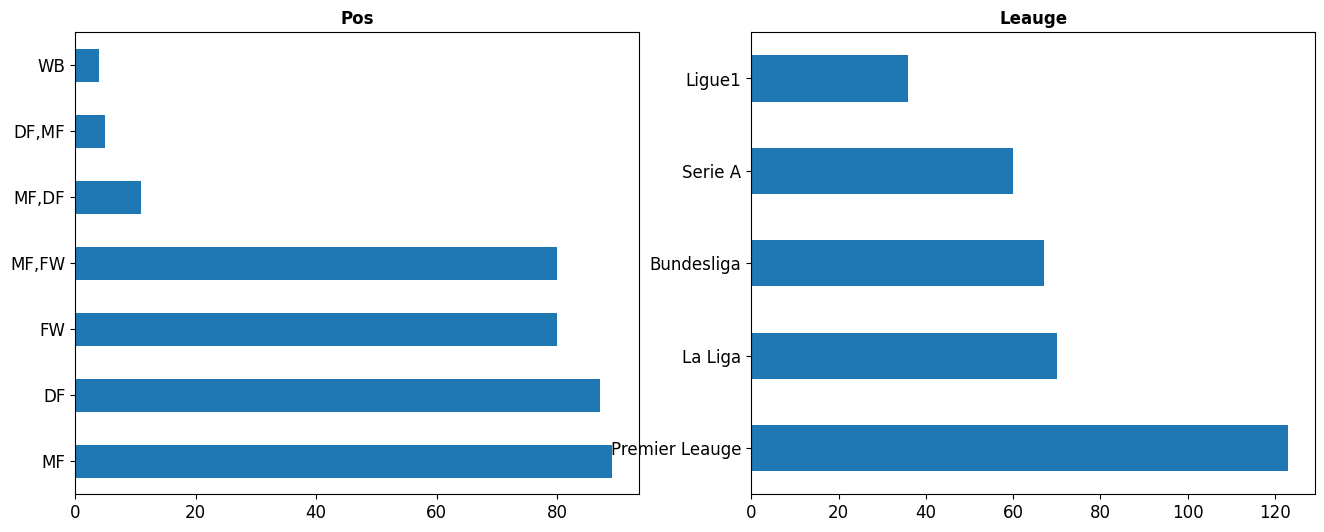

In [18]:
graficos_eda_categoricos(data.select_dtypes('O'))

In [19]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [20]:
estadisticos_cont(data.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Market value,356.0,34.522472,28.000,22.072309,16.00,20.00,28.000,40.0000,180.00
Age,356.0,24.058989,24.000,3.278509,15.00,22.00,24.000,26.0000,34.00
Min,356.0,3610.696629,3783.000,1418.034402,143.00,2518.75,3783.000,4803.0000,6174.00
Gls,356.0,8.977528,5.000,10.099759,0.00,2.00,5.000,13.0000,58.00
Ast,356.0,5.603933,4.000,5.311469,0.00,2.00,4.000,8.0000,30.00
Gls90,356.0,0.224579,0.140,0.213825,0.00,0.07,0.140,0.3500,1.19
Ast90,356.0,0.139017,0.120,0.114923,0.00,0.04,0.120,0.2000,0.58
G+A,356.0,0.363596,0.280,0.280966,0.00,0.14,0.280,0.5325,1.53
Gls+Ast,356.0,14.581461,10.000,13.730468,0.00,5.00,10.000,21.0000,88.00
SoT,356.0,25.103933,17.000,23.050902,1.00,8.00,17.000,36.5000,140.00


In [25]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = data.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
cat_ohe

In [27]:
num = data.select_dtypes('number').reset_index(drop = True)

In [28]:
df_ml = pd.concat([num,cat_ohe], axis = 1)
df_ml

,Market value,Age,Min,Gls,Ast,Gls90,Ast90,G+A,Gls+Ast,SoT,...,Pos_FW,Pos_MF,"Pos_MF,DF","Pos_MF,FW",Pos_WB,Leauge_Bundesliga,Leauge_La Liga,Leauge_Ligue1,Leauge_Premier Leauge,Leauge_Serie A
0,180.0,20.0,3856.0,51.0,12.0,1.19,0.28,1.47,63.0,114.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,128.0,24.0,4968.0,29.0,10.0,0.53,0.18,0.71,39.0,62.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,128.0,27.0,2757.0,28.0,13.0,0.91,0.42,1.33,41.0,52.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,120.0,27.0,5327.0,37.0,8.0,0.63,0.14,0.77,45.0,72.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120.0,27.0,5579.0,39.0,15.0,0.63,0.24,0.87,54.0,103.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,16.0,24.0,1747.0,9.0,3.0,0.46,0.15,0.61,12.0,30.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
352,16.0,22.0,2895.0,13.0,6.0,0.40,0.19,0.59,19.0,31.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
353,16.0,22.0,2611.0,4.0,3.0,0.14,0.10,0.24,7.0,24.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
354,16.0,28.0,2154.0,3.0,4.0,0.13,0.17,0.30,7.0,13.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
from random import sample

print(df_ml.columns[1:], "\n")
print(sample(set(df_ml.columns[1:]), 3))

Index(['Age', 'Min', 'Gls', 'Ast', 'Gls90', 'Ast90', 'G+A', 'Gls+Ast', 'SoT',
       'SoT%', 'Tackle', 'TackleW', 'Tkl%', 'Press', 'Blocks',
       'Passes Completed', 'Passes Attempted', 'Pos_DF', 'Pos_DF,MF', 'Pos_FW',
       'Pos_MF', 'Pos_MF,DF', 'Pos_MF,FW', 'Pos_WB', 'Leauge_Bundesliga',
       'Leauge_La Liga', 'Leauge_Ligue1', 'Leauge_Premier Leauge',
       'Leauge_Serie A'],
      dtype='object') 

['Press', 'Passes Attempted', 'TackleW']


<ipython-input-30-843c33cc1361>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  print(sample(set(df_ml.columns[1:]), 3))


In [42]:
data['Market value'] = data['Market value'].astype('int64')

<ipython-input-42-9dcc870c6e3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market value'] = data['Market value'].astype('int64')


In [67]:
x = data.drop(columns=['Market value','Leauge','Pos','Gls90', 'Ast90', 'G+A','SoT',
       'SoT%', 'TackleW', 'Tkl%'])
y = data['Market value']

In [68]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

In [72]:
from sklearn.ensemble import RandomForestClassifier

bosque = RandomForestClassifier(n_estimators=100,
                               criterion="gini",
                               max_features="sqrt",
                               bootstrap=True,
                               max_samples=2/3,
                               oob_score=True)

bosque.fit(x, data["Market value"].values)

#print(bosque.predict([[50, 16, 1, 1, 40]]))
print(bosque.score(x, data["Market value"].values))
print(bosque.oob_score_)

0.9971910112359551
0.0702247191011236


In [73]:
x.columns

Index(['Age', 'Min', 'Gls', 'Ast', 'Gls+Ast', 'Tackle', 'Press', 'Blocks',
       'Passes Completed', 'Passes Attempted'],
      dtype='object')

In [82]:
# Predicción
print(bosque.predict([[27,5000,5,10,15,145,1200,88,2680,3600]]))

[48]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [84]:
#Datos de jugador random
print('Valor de mercado',data['Market value'].iloc[70],'\n',x.iloc[70])

Valor de mercado 48 
 Age                   27.0
Min                 4834.0
Gls                    5.0
Ast                   10.0
Gls+Ast               15.0
Tackle               148.0
Press               1134.0
Blocks                90.0
Passes Completed    2964.0
Passes Attempted    3598.0
Name: 91, dtype: float64
